<a href="https://colab.research.google.com/github/Kanyi254/Syria-Tel-Project/blob/main/syriatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUSINESS UNDERSTANDING

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?

### Importing necessary libraries and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Syriatel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### DATA CLEANING

In [4]:
# check for missing values
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for unique values
df.nunique()

,0
state,51
account length,212
area code,3
phone number,3333
international plan,2
voice mail plan,2
number vmail messages,46
total day minutes,1667
total day calls,119
total day charge,1667


In [7]:
#separate numerical and categorical features
num_var = df.select_dtypes(include=['int64', 'float64']).columns
cat_var = df.select_dtypes(include=['object']).columns
print('Numerical Variables:', num_var)

print('Categorical Variables:', cat_var)

Numerical Variables: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical Variables: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [8]:
# drop phone numbers,area code and state as they do not affect churn
df = df.drop(columns=["phone number","area code","state"])
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
#lets change churn from bool to binary digits
df['churn'] = df['churn'].map({False: 0, True: 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [10]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


###  EDA


In [12]:
churn_count = df['churn'].value_counts()
churn_count

,count
churn,
0,2850
1,483


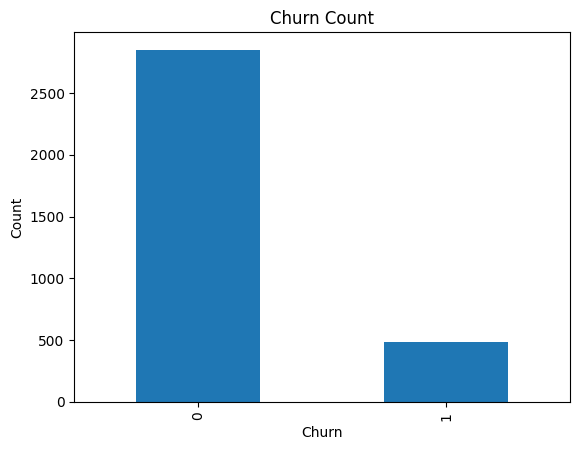

In [13]:
#let's start plotting a bargraph for churn
churn_count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Count')
plt.show()

we have a lot of false churns than true churns. Given The imblance we may need to oversample the minority class or we apply class weights in the model

In [14]:
num_var = df.select_dtypes(include=['int64', 'float64']).columns
num_var

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

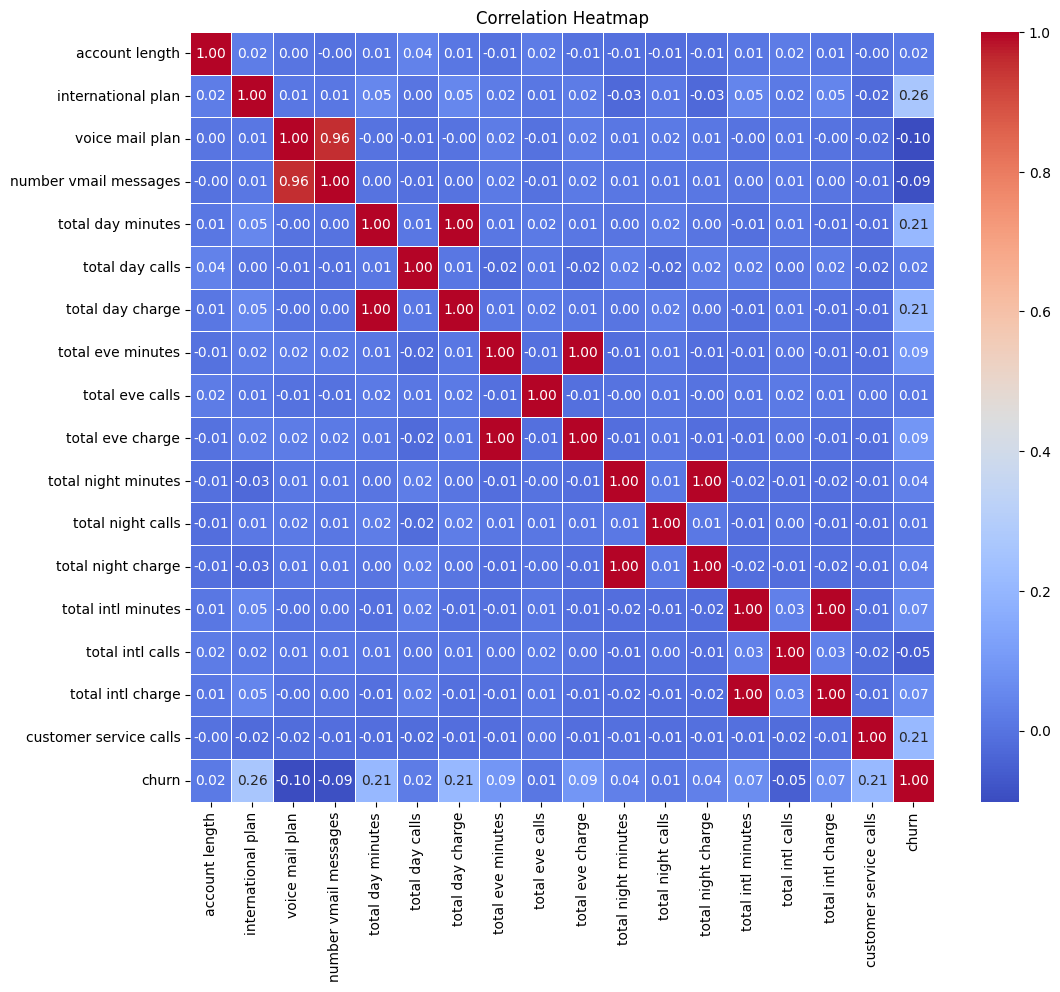

In [15]:
# lets plot a correlation heatmap for numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_var].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#let's look for highly correlated features
corr_matrix = df[num_var].corr().abs().stack().reset_index()
corr_matrix.columns = ['Variable 1', 'Variable 2', 'Correlation']
highly_correlated = corr_matrix[corr_matrix['Correlation'] > 0.7]
highly_correlated


,Variable 1,Variable 2,Correlation
0,account length,account length,1.000000
19,international plan,international plan,1.000000
38,voice mail plan,voice mail plan,1.000000
39,voice mail plan,number vmail messages,0.956927
56,number vmail messages,voice mail plan,0.956927
57,number vmail messages,number vmail messages,1.000000
76,total day minutes,total day minutes,1.000000
78,total day minutes,total day charge,1.000000
95,total day calls,total day calls,1.000000
112,total day charge,total day minutes,1.000000


In [17]:
# corr for churn and the others
churn_corr = df.corr()['churn'].sort_values(ascending=False)
churn_corr

,churn
churn,1.000000
international plan,0.259852
customer service calls,0.208750
total day minutes,0.205151
total day charge,0.205151
total eve minutes,0.092796
total eve charge,0.092786
total intl charge,0.068259
total intl minutes,0.068239
total night charge,0.035496


* from the observation we see that churn is highly correlated to customer service calls, totatl day charge and total day minutes. This churn increases with increase in those categories
* total eve calls, total night calls and total international calls show a weak correlation to churn

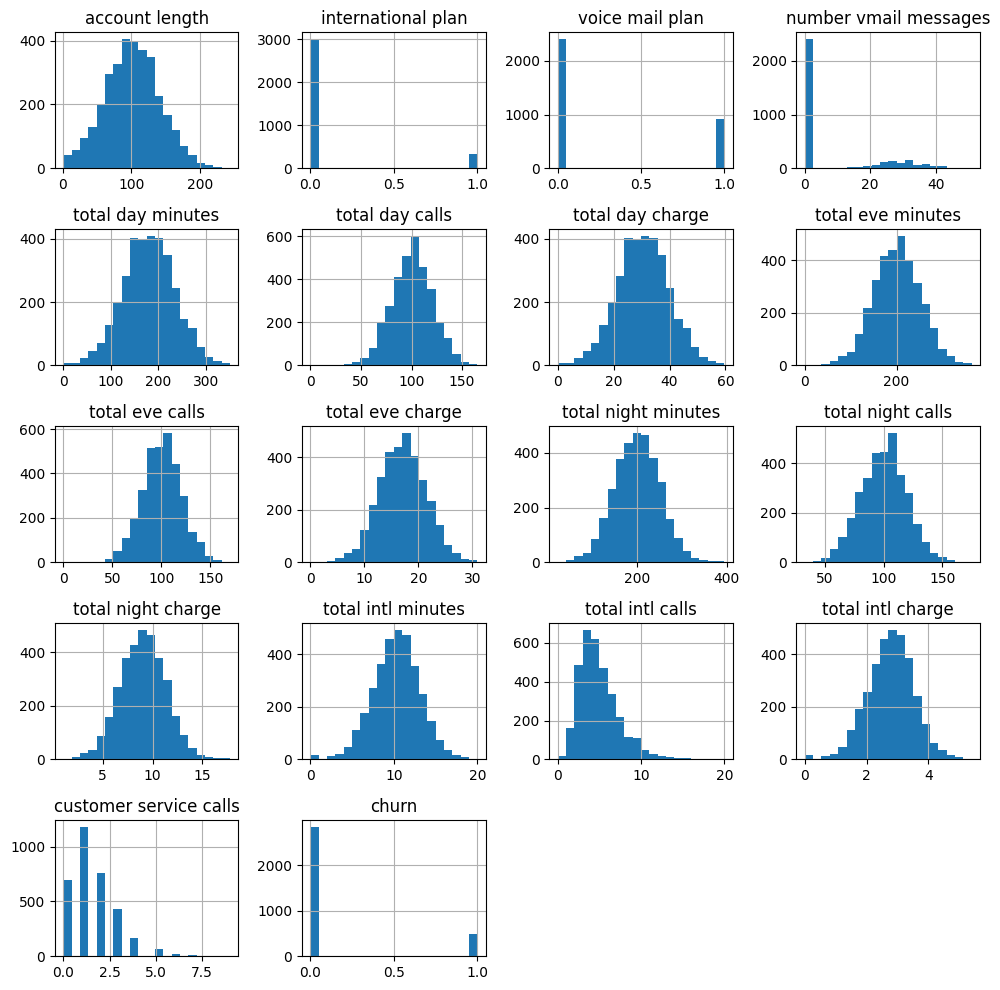

In [18]:
#distribution for numeric features
df[num_var].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

most of our numeric variables have a normal distribution.

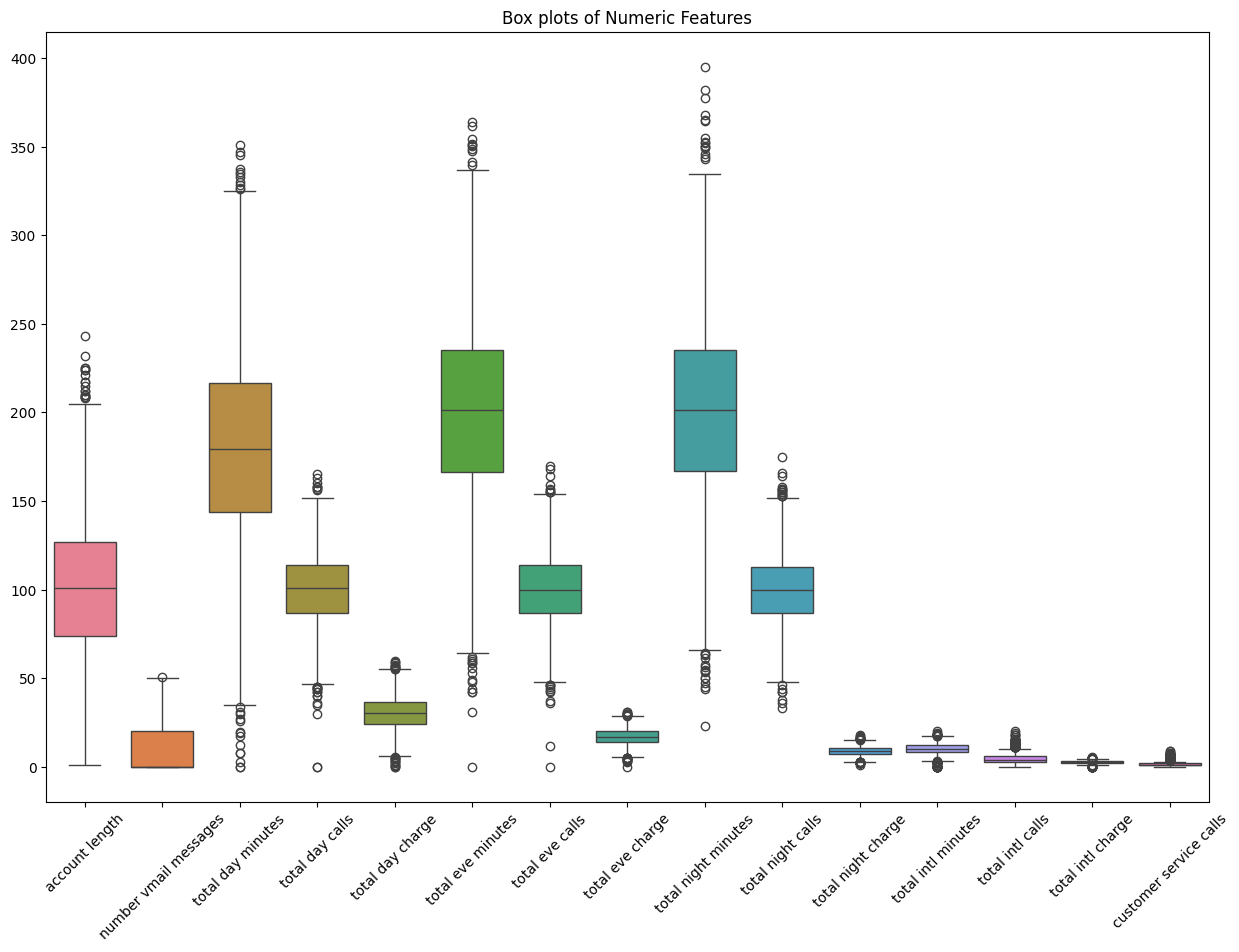

In [19]:
#let's look for outliers
num_var2 = num_var.drop(['churn', 'international plan', 'voice mail plan'])
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[num_var2])
plt.title('Box plots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

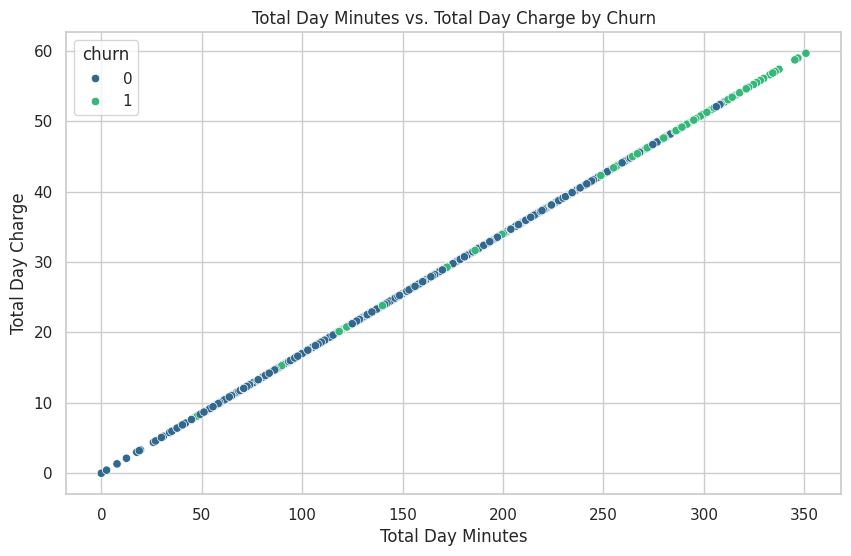

In [22]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Scatterplot: Total Day Minutes vs. Total Day Charge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total day minutes', y='total day charge', hue='churn', data=df, palette='viridis')
plt.title('Total Day Minutes vs. Total Day Charge by Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.show()


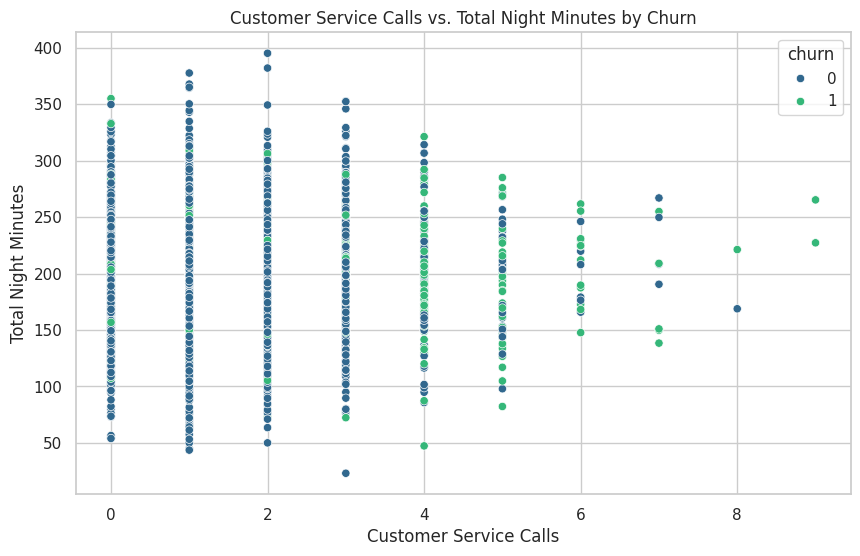

In [23]:
# 2. Scatterplot: Customer Service Calls vs. Total Night Minutes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='customer service calls', y='total night minutes', hue='churn', data=df, palette='viridis')
plt.title('Customer Service Calls vs. Total Night Minutes by Churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Total Night Minutes')
plt.show()

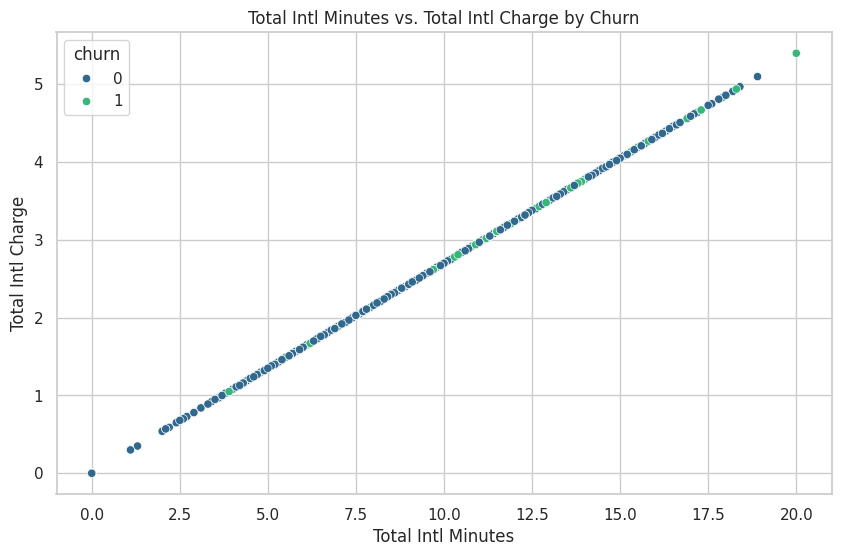

In [24]:
# 3. Scatterplot: Total Intl Minutes vs. Total Intl Charge
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total intl minutes', y='total intl charge', hue='churn', data=df, palette='viridis')
plt.title('Total Intl Minutes vs. Total Intl Charge by Churn')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Total Intl Charge')
plt.show()

### FEATURE ENGINEERING


Remember we said we have an imbalanced dataset(churn). We have to deal with it. We can oversample the minority or undersample the minority or class weighing. Here we also haveto modify, select and create features that can improve the model perfomance.

Imputation:

For numerical features, we use SimpleImputer with the median strategy to fill missing values.
For categorical features, we use the most frequent value to fill missing data.

Scaling:

Numerical features are scaled using StandardScaler, which centers the data and scales it to unit variance.

One-Hot Encoding:

Categorical features are converted into a binary format using OneHotEncoder. The drop='first' parameter avoids multicollinearity by dropping one category.

In [27]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your cleaned DataFrame without 'phone number', 'area code', and 'state'
X = df.drop(columns=['churn'])  # 'churn' is the target variable
y = df['churn']

# Define categorical and numerical columns
categorical_cols = ['international plan', 'voice mail plan']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_cols),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first'))]), categorical_cols)
    ])

# Applying the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)

# Display the shape of the processed data
X_processed.shape


(3333, 19)

In [28]:
# Applying SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the shape of the processed and resampled data
X_train_res.shape, y_train_res.shape, X_test.shape, y_test.shape

((3990, 19), (3990,), (1000, 19), (1000,))

### MODELLING

First am going to test out a basic logistic model.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logreg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[646 209]
 [ 41 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       855
           1       0.33      0.72      0.45       145

    accuracy                           0.75      1000
   macro avg       0.64      0.74      0.65      1000
weighted avg       0.85      0.75      0.78      1000


Accuracy Score: 0.75


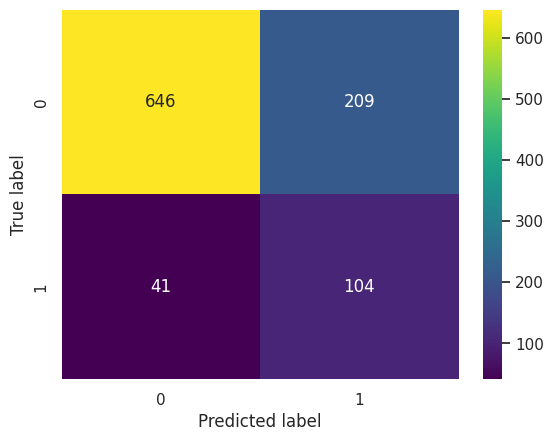

In [35]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
plot_confusion_matrix(y_test, y_pred, [0,1])


Imbalance Issue: The model struggles with predicting the minority class (churn). Precision for churn (class 1) is quite low at 0.33, indicating a high number of false positives.

Recall for Churn: The recall for churn (0.72) is relatively good, meaning the model is doing a decent job of identifying actual churn cases, though it comes at the cost of many false positives

Precision:
For class 0 (non-churn): 0.94, indicating that when the model predicts non-churn, it's correct 94% of the time.
For class 1 (churn): 0.33, indicating lower precision, so when the model predicts churn, it's correct 33% of the time.

Accuracy Score:

0.75: The model correctly classified 75% of the instances. While this may seem reasonable, the imbalanced nature of the dataset means that accuracy alone might not be the best measure of model performance.

#### Advanced modelling

Now am going to try out a Decision Tree